In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
file_path = 'Dataset_Final.csv'
df = pd.read_csv(file_path)
# Encode categorical target variable
label_encoder = LabelEncoder()
df["Role"] = label_encoder.fit_transform(df["Role"])

In [3]:
# Adjust pandas settings to display the dataset in a cleaner format
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)       # Adjust column width
pd.set_option('display.max_rows', 20)      # Limit row output
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Data Science,Troubleshooting skills,Graphics Designing,Openness,Conscientousness,Extraversion,Agreeableness,Neuroticism,Communication skills,Role
0,6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.714603,0.480564,0.470877,0.039611,0.086927,4,6
1,6,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.617218,0.452903,0.377581,0.090148,0.071425,4,6
2,6,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.814072,0.461668,0.347739,0.138575,0.095261,4,6
3,6,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.607495,0.521783,0.403756,0.114925,0.122656,4,6
4,6,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.781293,0.319539,0.240337,0.050988,0.065564,4,6


In [4]:
df.isnull().sum()

Database Fundamentals            0
Computer Architecture            0
Distributed Computing Systems    0
Cyber Security                   0
Networking                       0
                                ..
Extraversion                     0
Agreeableness                    0
Neuroticism                      0
Communication skills             0
Role                             0
Length: 23, dtype: int64

In [5]:
# Split dataset (reduce training size)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train and evaluate Random Forest model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"KNN  Accuracy: {accuracy * 100:.2f}%")

KNN  Accuracy: 91.21%


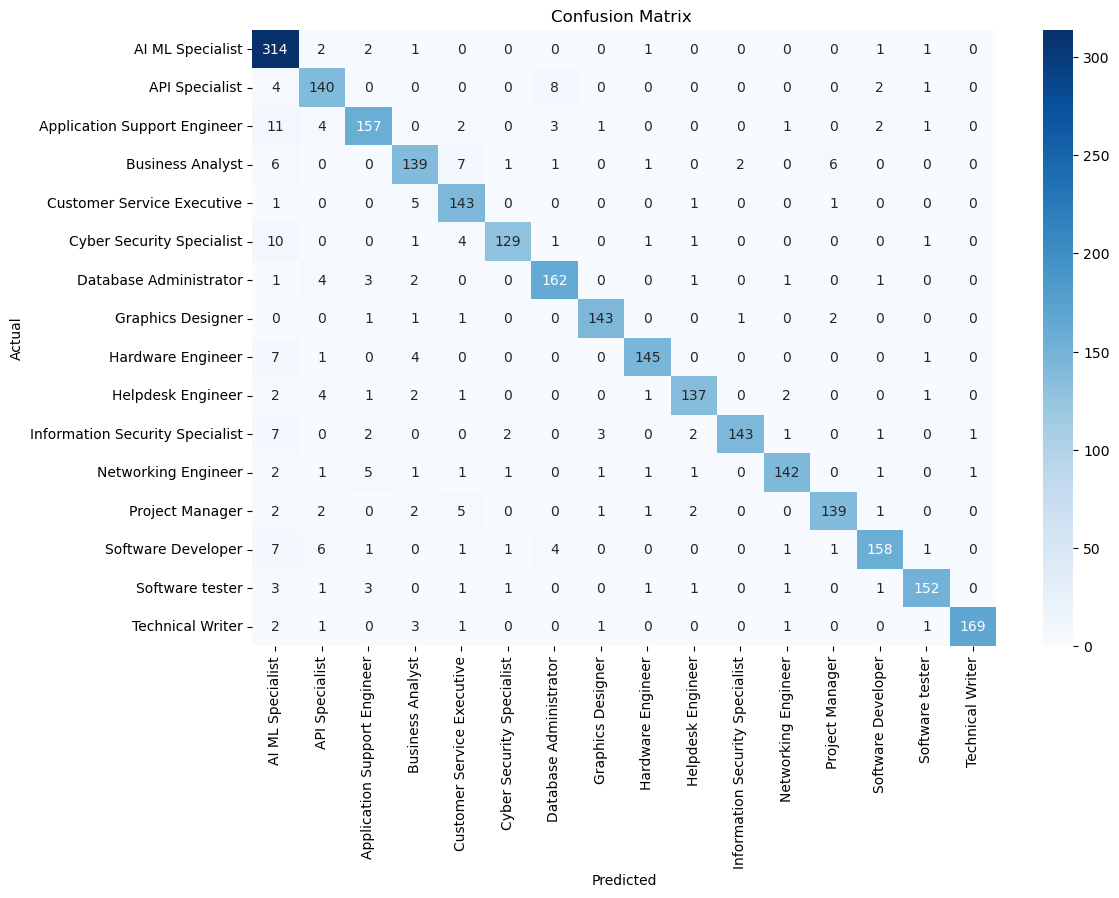

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()